In [1]:


# load libraries and set plot parameters
import numpy as np
# import PrettyTable as pt

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import ticker

from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)
# plt.rcParams['text.latex.unicode'] = True

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 100

plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14

# plt.rcParams['text.usetex'] = True
# plt.rcParams['font.family'] = "serif"
# plt.rcParams['font.serif'] = "cm"
# plt.rcParams['text.latex.preamble'] = "\usepackage{subdepth}, \usepackage{type1cm}"

from IPython.display import display, Markdown, display_latex, Latex, display_markdown, Image
import sympy as s
s.init_printing()
from sympy.physics import units as u
from sympy.physics import vector as v


## Dinamika 3/2 házi feladat megoldása

### Készítette: Kovács András (N80PN7)

<font size="3"> Adottak az $x = f(t) = 3e^{0.1t}$ és $y=\varphi(t)=10e^{-0.1t}$ mozgásegyenletek és a $t^\prime =4\,[s]$ időpont.

### I. Mozgáspálya

In [2]:
x, y, t = s.symbols("x y t")
v_x = s.symbols("v_{x}(t)")
v_y = s.symbols("v_{y}(t)")
a_x = s.symbols("a_{x}(t)")
a_y = s.symbols("a_{y}(t)")

x_expr = 3 * s.exp(0.1 * t)
y_expr = 10 * s.exp(-0.1 * t)
t_ = 4
v_x_expr = s.diff(x_expr,t)
v_y_expr = s.diff(y_expr,t)
a_x_expr = s.diff(v_x_expr,t)
a_y_expr = s.diff(v_y_expr,t)

In [3]:
t_base = np.linspace(0,20,5000)
x_calc = s.lambdify(t, x_expr, "numpy")(t_base)
y_calc = s.lambdify(t, y_expr, "numpy")(t_base)
x_val = x_expr.subs(t, t_)
y_val = y_expr.subs(t, t_)
P_vec = np.array([x_val,y_val])

<font size="3"> A mozgásegyenletekbe behelyettesítve a $t^\prime = 4\, [s]$ kapjuk a $P$ pont koordinátáit a vizsgált időpillanatban:

In [4]:
display(Markdown(u'<font size=\"3\"> $$ P = [' + 
                 str(x_val.round(3)) + ',' + 
                 str(y_val.round(3)) + '] $$'))

<font size="3"> $$ P = [4.475,6.703] $$

<font size="3"> A mozgáspálya diagramja:

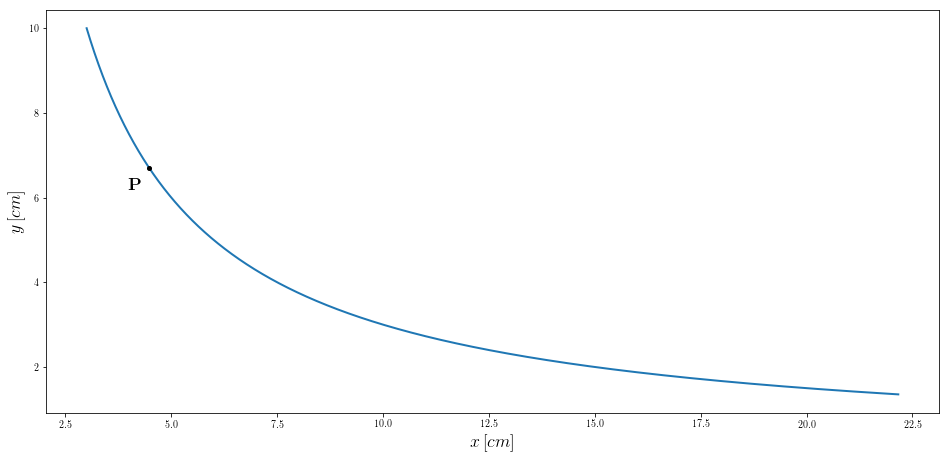

In [26]:
f1, ax1 = plt.subplots(figsize=(16,9))
ax1.plot(x_calc, y_calc)
ax1.plot(x_val, y_val,'k.')
ax1.set_xlabel('$x\, [cm]$', fontsize=18)
ax1.text(x_val-0.5, y_val-0.5,'$\mathbf P$', size = 18)
ax1.set_aspect(1.0)
# ax1.grid()
qwerty = ax1.set_ylabel('$y\, [cm]$ ', fontsize=18)

### II. Pályaegyenlet

<font size="3">Bevezetve a $\gamma=e^{0.1t}$ segédváltozót, a mozgásegyenletek:  $$x = f(t) = 3e^{0.1t} = 3\gamma\label{iksz}$$ és $$y=\varphi(t)=10e^{-0.1t} = \frac{10}{\gamma}\label{ipsz}$$ behelyettesítéssel kapjuk, hogy: $$y = \frac{30}{x}$$

In [6]:
display(Markdown(u"###  III. $" + 
                 s.latex(v_x) + ",\," +
                 s.latex(v_y) + ",\," +
                 s.latex(a_x) + ",\," +
                 s.latex(a_y) + u"$ kiszámítása"))                 

###  III. $v_{x}(t),\,v_{y}(t),\,a_{x}(t),\,a_{y}(t)$ kiszámítása

In [7]:
display(Markdown(u"<font size=\"3\">Elvégezve a differenciálásokat és behelyettesítve a $t^\prime = " + 
                 str(t_) + 
                 u"$ értéket kapjuk, hogy:"))

<font size="3">Elvégezve a differenciálásokat és behelyettesítve a $t^\prime = 4$ értéket kapjuk, hogy:

In [8]:
v_x_val = v_x_expr.subs(t, t_)
display(Markdown(u'$$' +
                 s.latex(v_x) +"=" + 
                 "\dot f(t) =" +
                 s.latex(v_x_expr) + "=" + 
                 str(s.N(v_x_val,2)) + 
                 u"\,[m/s]" + 
                 u"$$"))

$$v_{x}(t)=\dot f(t) =0.3 e^{0.1 t}=0.45\,[m/s]$$

In [9]:
v_y_val = v_y_expr.subs(t, t_)
display(Markdown(u'$$' +  
                 s.latex(v_y) +"=" + 
                 "\dot\\varphi(t) =" +
                 s.latex(v_y_expr) + "=" + 
                 str(s.N(v_y_val,2)) + 
                 u"\,[m/s]" + 
                 u"$$"))


$$v_{y}(t)=\dot\varphi(t) =- 1.0 e^{- 0.1 t}=-0.67\,[m/s]$$

In [10]:
a_x_val = a_x_expr.subs(t, t_)
display(Markdown(u'$$' + 
                 s.latex(a_x) + "=\dot " +
                 s.latex(v_x) + "=" +
                 s.latex(a_x_expr) + "=" + 
                 str(s.N(a_x_val,2)) + 
                 u"\,[m/s^2]" + 
                 u"$$"))


$$a_{x}(t)=\dot v_{x}(t)=0.03 e^{0.1 t}=0.045\,[m/s^2]$$

In [11]:
a_y_val = a_y_expr.subs(t, t_)
display(Markdown(u'$$' + 
                 s.latex(a_y) + "=\dot " +
                 s.latex(v_y) + "=" + 
                 s.latex(a_y_expr) + "=" + 
                 str(s.N(a_y_val,2)) + 
                 u"\,[m/s^2]" + 
                 u"$$"))


$$a_{y}(t)=\dot v_{y}(t)=0.1 e^{- 0.1 t}=0.067\,[m/s^2]$$

In [12]:
nd = 2
a_vec = np.array([float(s.N(a_x_val, nd)),float(s.N(a_y_val, nd))])
v_vec = np.array([float(s.N(v_x_val, nd)), float(s.N(v_y_val, nd))])
e_v = v_vec/np.linalg.norm(v_vec)

In [13]:
display(Markdown(u"<font size=\"3\"> Vagyis $\mathbf{v} =" +  str(v_vec.round(2).tolist()) + 
                 u", \mathbf{a} =" + str(a_vec.round(3).tolist()) + u'.$'))

<font size="3"> Vagyis $\mathbf{v} =[0.45, -0.67], \mathbf{a} =[0.045, 0.067].$

###  IV. Sebesség- és gyorsulásvektorok ábrázolása

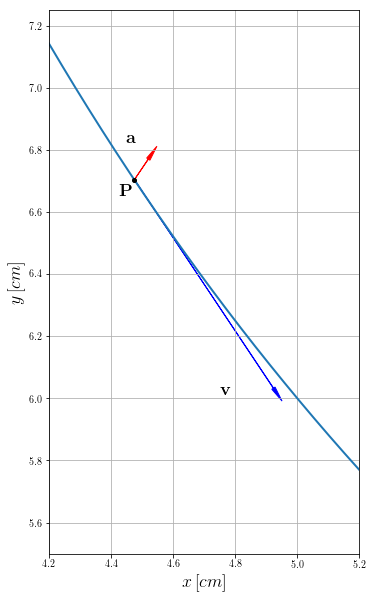

In [14]:
f2, ax2 = plt.subplots(figsize=(16,10))
ax2.plot(x_calc, y_calc)
ax2.plot(x_val, y_val, 'k.')
# ax2.arrow(x_val, y_val, x_val + v_x_val, y_val + v_y_val, head_width=0.05, head_length=0.1, fc='k', ec='k')
ax2.arrow(x_val, y_val, float(v_x_val), float(v_y_val), head_width=0.0125, head_length=0.05, fc='b', ec='b')
ax2.arrow(x_val, y_val, float(a_x_val), float(a_y_val), head_width=0.0125, head_length=0.05, fc='r', ec='r')
ax2.text(4.75, 6.0125,'$\mathbf v$', size = 18)
ax2.text(4.45, 6.825,'$\mathbf a$', size = 18)
ax2.text(x_val-0.05, y_val-0.05,'$\mathbf P$', size = 18)
ax2.set_xlabel('$x\, [cm]$', fontsize=18)
ax2.set_xlim(4.2,5.2)
ax2.set_ylim(5.5, 7.25)
ax2.set_aspect(1.0)
ax2.grid()
qwerty = ax2.set_ylabel('$y\, [cm]$ ', fontsize=18)

### V. Simulókör meghatározása

In [15]:
np.set_printoptions(precision=3)
display(Markdown(u"<font size=\"3\"> A $\mathbf{v}$ irányú egységvektor:"))

<font size="3"> A $\mathbf{v}$ irányú egységvektor:

In [16]:
display( Markdown(u"<font size=\"3\">$$\mathbf{e}_{v} =\\frac{\mathbf{v}}{\\mid\mathbf{v}\mid} = " + 
                  str(e_v.round(3).tolist()) + "$$."))

<font size="3">$$\mathbf{e}_{v} =\frac{\mathbf{v}}{\mid\mathbf{v}\mid} = [0.556, -0.831]$$.

<font size="3"> Ebből a normálvektor:  

In [17]:
e_n = np.dot(e_v, np.array([[0,1],[-1,0]]))
display(Markdown(u"$$\mathbf{e}_{n} =" +  str(e_n.round(3).tolist()) + 
                 u"$$."))

$$\mathbf{e}_{n} =[0.831, 0.556]$$.

<font size="3"> A gyorsulásvektor normálirányú komponense:  

In [18]:
a_vec_n = np.dot(a_vec, e_n)
display(Markdown(u"$$a_{n} =" + 
                 "\mathbf{a}\cdot\mathbf{e}_{n} =" +
                 str(a_vec_n.round(3)) + 
                 u"$$."))

$$a_{n} =\mathbf{a}\cdot\mathbf{e}_{n} =0.074$$.

<font size="3"> A simulókör sugarát az $a_n=\mathbf{v}^2 / \rho$ összefügés átalakításával kapjuk: 

In [19]:
rho = np.dot(v_vec,v_vec) / a_vec_n
display(Markdown(u"$$\\rho = \\frac{\mathbf{v}^2 }{ a_{n}} =" + 
                 str(rho.round(3)) + 
                 u"$$."))

$$\rho = \frac{\mathbf{v}^2 }{ a_{n}} =8.723$$.

<font size="3">A simulókör $K$ középpontja a $P$ ponttól $\mathbf{e}_n$ irányban $\rho$ távolságra van, vektorosan írva:

In [20]:
K_vec = P_vec + rho * e_n
# K_vec.astype(np.double).round(3).tolist()
display(Markdown(u"$$\mathbf{K} = \mathbf{P} + \\rho \cdot \mathbf{e}_n = " + 
                 str(K_vec.astype(np.double).round(3).tolist()) + 
                 u"$$."))

$$\mathbf{K} = \mathbf{P} + \rho \cdot \mathbf{e}_n = [11.728, 11.55]$$.

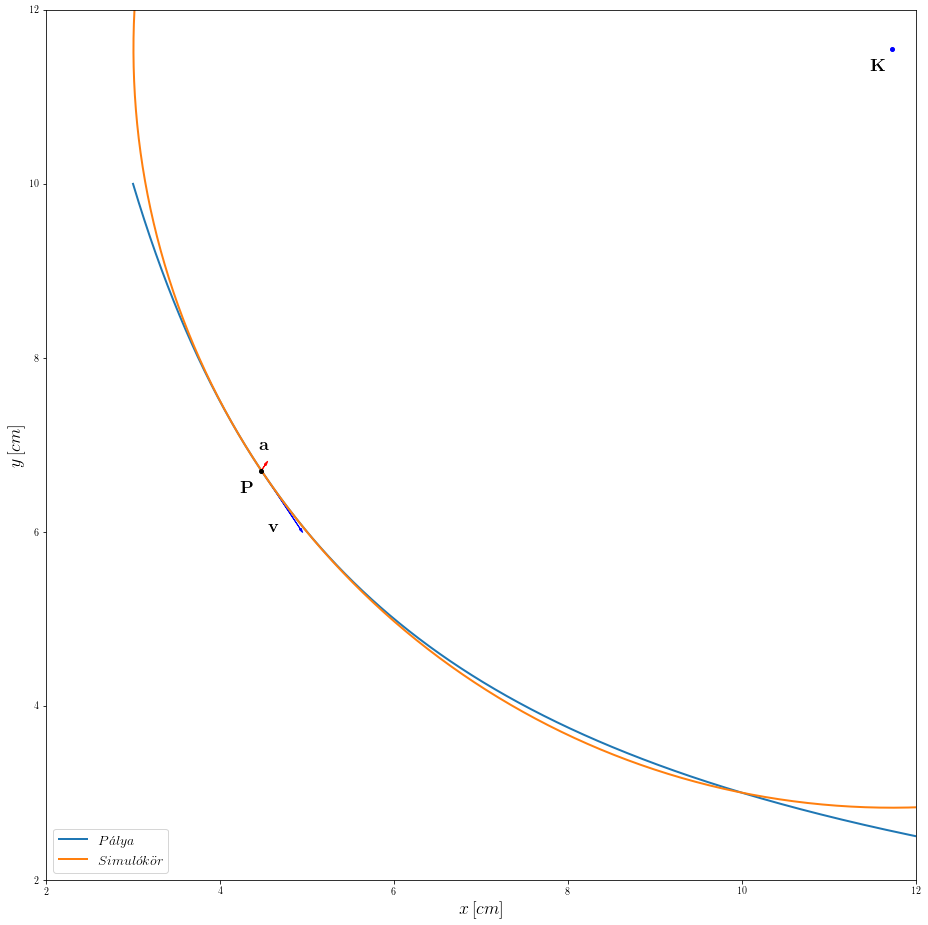

In [25]:
c_base = np.linspace(-6*np.pi/5, 0, 400)
c_y = K_vec[1] + rho*np.sin(c_base)
c_x = K_vec[0] + rho*np.cos(c_base)
f3, ax3 = plt.subplots(figsize=(16,16))
ax3.plot(x_calc, y_calc, label=u'$Pálya$')
ax3.plot(c_x, c_y, label=u'$Simulókör$')
ax3.plot(x_val, y_val, 'k.')
ax3.plot(K_vec[0],K_vec[1], 'b.')
ax3.arrow(x_val, y_val, float(v_x_val), float(v_y_val), head_width=0.025, head_length=0.05, fc='b', ec='b')
ax3.arrow(x_val, y_val, float(a_x_val), float(a_y_val), head_width=0.025, head_length=0.05, fc='r', ec='r')
ax3.text(4.55, 6.0125,'$\mathbf v$', size = 18)
ax3.text(4.45, 6.95,'$\mathbf a$', size = 18)
ax3.text(x_val-0.25, y_val-0.25,'$\mathbf P$', size = 18)
ax3.text(K_vec[0]-0.25, K_vec[1]-0.25,'$\mathbf K$', size = 18)
ax3.set_xlabel('$x\, [cm]$', fontsize=18)
ax3.set_xlim(2,12)
ax3.set_ylim(2, 12)
ax3.set_aspect(1.0)
ax3.legend()
# ax3.grid()
# patch = mpatches.Circle((K_vec[0], K_vec[1]), radius = rho, alpha=0.5, transform=None)
# patch = mpatches.Circle((7,7),1, alpha=0.5, transform=None)
# f3.artists.append(patch)

qwerty = ax3.set_ylabel('$y\, [cm]$ ', fontsize=18)